In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Copy of complaints.csv'
df = pd.read_csv(file_path)
df.head()

/tmp/ipython-input-3-3938831295.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


initial EDA — Understand Data Structure

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

In [ ]:
df.describe(include='all')

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
count,9609797,9609797,9374502,9609791,8770275,2980756,4839590,9609797,9555281,9579569,628768,7960236,9609797,9609797,9609777,9609797,768299,9.609797e+06
unique,4952,21,86,178,272,2108758,11,7674,63,34965,3,4,7,4901,8,2,2,NaN
top,2025-01-17,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,In accordance with the Fair Credit Reporting a...,Company has responded to the consumer and the ...,"EQUIFAX, INC.",FL,XXXXX,Servicemember,Consent not provided,Web,2025-02-25,Closed with explanation,Yes,No,NaN
freq,34093,4834855,6955847,3613761,2324057,21622,4537468,2321626,1273171,172807,391563,4639279,9017914,32525,5487712,9535859,619921,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.092744e+06
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.774842e+06
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.038016e+06
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.448508e+06
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.129591e+07


In [ ]:
df.columns


Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [ ]:
df.isnull().sum()


,0
Date received,0
Product,0
Sub-product,235295
Issue,6
Sub-issue,839522
Consumer complaint narrative,6629041
Company public response,4770207
Company,0
State,54516
ZIP code,30228


Analyze Complaint Distribution Across Products

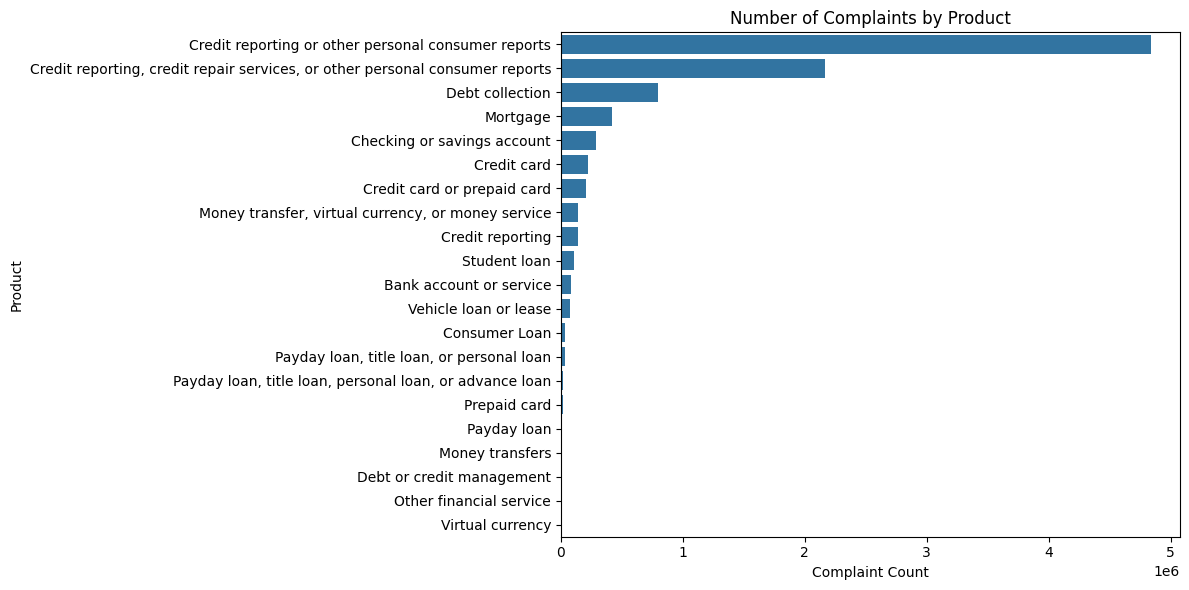

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Product', order=df['Product'].value_counts().index)
plt.title("Number of Complaints by Product")
plt.xlabel("Complaint Count")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


In [ ]:
Analyze Narrative Lengths

In [ ]:
!pip install swifter


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=48b4b0fa7245467aeb5cd719564a6f2aff1a49314083ecbb0dc69cadef70706e
  Stored in directory: /root/.cache/pip/wheels/ef/7f/bd/9bed48f078f3ee1fa75e0b29b6e0335ce1cb03a38d3443b3a3
Successfully built swifter


Pandas Apply:   0%|          | 0/9609797 [00:00<?, ?it/s]

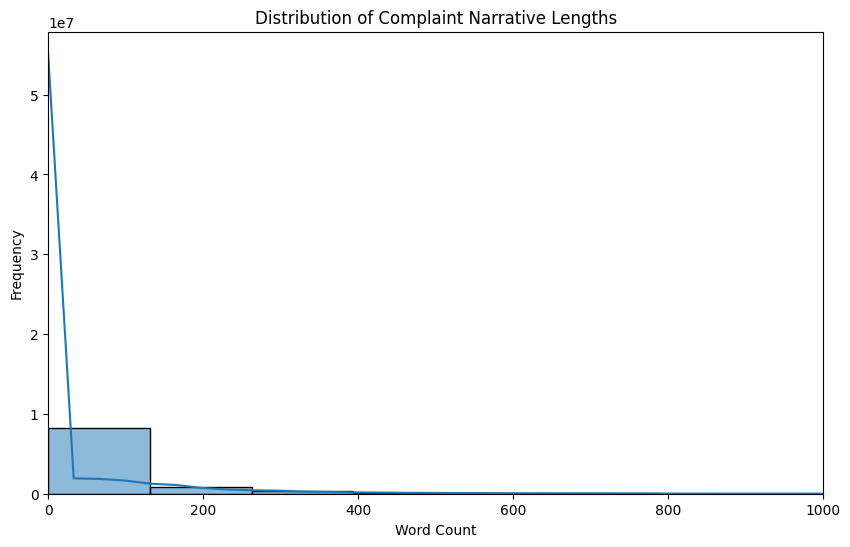

In [ ]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

import swifter
df['narrative_length'] = df['Consumer complaint narrative'].fillna('').swifter.apply(lambda x: len(tokenizer.tokenize(x)))

plt.figure(figsize=(10,6))
sns.histplot(df['narrative_length'], bins=50, kde=True)
plt.title("Distribution of Complaint Narrative Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.xlim(0, 1000)
plt.show()


In [ ]:
print("Shortest narratives:")
print(df[df['narrative_length'] == df['narrative_length'].min()]['Consumer complaint narrative'].values)

print("\nLongest narratives:")
print(df[df['narrative_length'] == df['narrative_length'].max()]['Consumer complaint narrative'].values)


Shortest narratives:
[nan nan nan ... nan nan nan]

Longest narratives:
['XX/XX/XXXX SECTION 4- COMPLAINT Carhop Addition space On XX/XX/XXXX, I purchase a XXXX  XXXX from Car Hop at XXXX XXXX XXXX. XXXX, Ca. XXXX, and I paid on that car twice a month on the XX/XX/XXXX and XX/XX/XXXX each month a sum of {$240.00} until XX/XX/XXXX when it was traded for XXXX XXXX XXXX. On XX/XX/XXXX I received a call from Sales Consultant XXXX XXXX from Carhop, he said that he was calling to update my account, when he notice that my car was due to be paid off. I said yes it is in ( 3 ) more car payments, so XXXX asked me if I wanted to upgrade in a newer used car and I could use my truck for a down payment or trade-in, so I said ok and drove there to the XXXX, Ca. office. I told XXXX that I was in a big SUV and I would have to have that because I am a XXXX XXXX XXXX for XXXX, and I XXXX XXXX two people one age XXXX with XXXX in XXXX, and XXXX yr. old male with XXXX in XXXX he then said to me that he had

Complaints With vs Without Narratives

With narratives: 2980756
Without narratives: 6629041


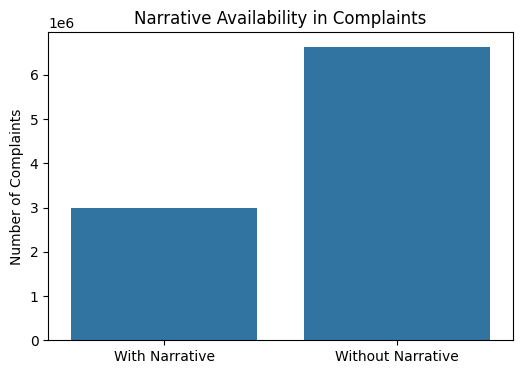

In [ ]:
has_narrative = df['Consumer complaint narrative'].notnull()
without_narrative = ~has_narrative

print("With narratives:", has_narrative.sum())
print("Without narratives:", without_narrative.sum())

plt.figure(figsize=(6,4))
sns.barplot(x=['With Narrative', 'Without Narrative'], y=[has_narrative.sum(), without_narrative.sum()])
plt.title("Narrative Availability in Complaints")
plt.ylabel("Number of Complaints")
plt.show()


In [ ]:
df['Product'].unique()


array(['Credit reporting or other personal consumer reports',
       'Debt collection', 'Credit card', 'Checking or savings account',
       'Money transfer, virtual currency, or money service',
       'Vehicle loan or lease', 'Debt or credit management', 'Mortgage',
       'Payday loan, title loan, personal loan, or advance loan',
       'Prepaid card', 'Student loan', 'Credit reporting',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Credit card or prepaid card',
       'Payday loan, title loan, or personal loan',
       'Bank account or service', 'Money transfers', 'Consumer Loan',
       'Payday loan', 'Other financial service', 'Virtual currency'],
      dtype=object)

In [ ]:
def map_product(original_name):
    name = original_name.lower()

    if 'credit card' in name:
        return 'Credit card'
    elif 'personal loan' in name or 'payday loan' in name:
        return 'Personal loan'
    elif 'buy now' in name:
        return 'Buy Now, Pay Later'
    elif 'savings' in name or 'checking' in name or 'bank account' in name:
        return 'Savings account'
    elif 'money transfer' in name or 'virtual currency' in name:
        return 'Money transfers'
    else:
        return None  # We’ll exclude these later


In [ ]:
df['Mapped Product'] = df['Product'].apply(map_product)
filtered_df = df[df['Mapped Product'].notnull()]
filtered_df['Mapped Product'].value_counts()


,count
Mapped Product,
Credit card,433055
Savings account,377383
Money transfers,150438
Personal loan,52696


In [ ]:
filtered_df = filtered_df[filtered_df['Consumer complaint narrative'].notnull()]
filtered_df = filtered_df[filtered_df['Consumer complaint narrative'].str.strip() != '']


Clean Complaint Narratives

In [ ]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'i am writing to file a complaint|to whom it may concern|dear cfpb', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

filtered_df['cleaned_narrative'] = filtered_df['Consumer complaint narrative'].apply(clean_text)



In [ ]:
filtered_df.isnull().sum()



,0
Date received,0
Product,0
Sub-product,20619
Issue,0
Sub-issue,160243
Consumer complaint narrative,0
Company public response,280278
Company,0
State,5510
ZIP code,0


In [ ]:
filtered_df['Mapped Product'].value_counts()


,count
Mapped Product,
Credit card,189334
Savings account,155204
Money transfers,98701
Personal loan,27880


In [ ]:
print(filtered_df.shape)
filtered_df[['Mapped Product', 'cleaned_narrative']].sample(5)


(471119, 20)


,Mapped Product,cleaned_narrative
5646960,Savings account,a couple of weeks ago i submitted a complaint ...
1566573,Credit card,i am an identity theft victim on xxxxxxxx i re...
630664,Money transfers,i got a work from home job offer by xxxx xxxx ...
4686552,Money transfers,i got a email from paypal yesterday stating th...
1878110,Savings account,your account against navy federal credit union...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Save to a folder inside your Drive
filtered_df.to_csv('/content/drive/MyDrive/cleaned_complaints.csv', index=False)
